Analyzing the dataframe

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor



df = pd.read_csv('data/Preços_de_casas.csv')

df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


First dataframe treatment

In [98]:
df.drop(columns="Id", inplace=True)

Defining the correlation between the columns and comparing them with the column "preco_de_venda"

In [99]:
corr = df.corr()
corr["preco_de_venda"]

area_primeiro_andar               0.616557
existe_segundo_andar              0.138541
area_segundo_andar                0.305311
quantidade_banheiros              0.563132
capacidade_carros_garagem         0.640214
qualidade_da_cozinha_Excelente    0.496223
preco_de_venda                    1.000000
Name: preco_de_venda, dtype: float64

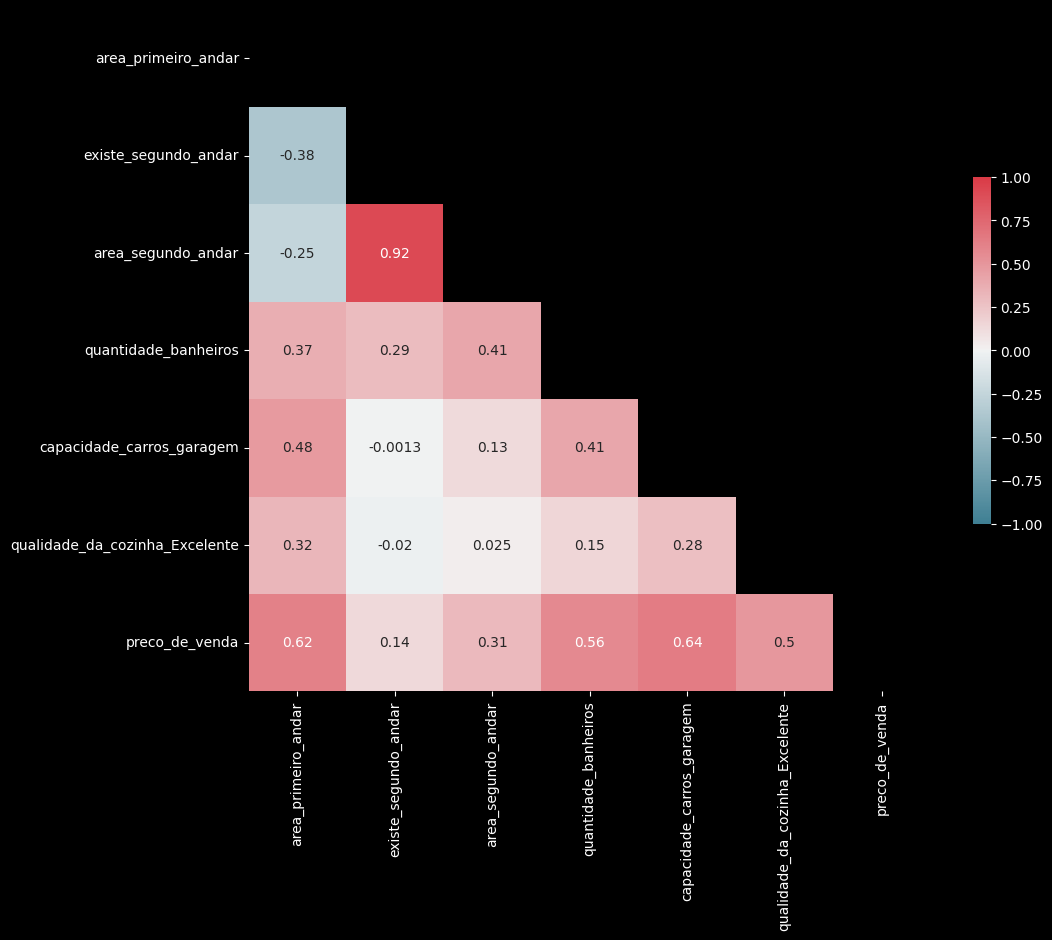

In [100]:
plt.style.use('dark_background')

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=0, annot=True, cbar_kws={"shrink": .5})

plt.show()

Example of analysis: it can be seen that the area of the second floor becomes negative in relation to the area of the first floor, which means that the areas of the second floor tend to decrease as the size of the first floor increases.

Now we can compare the "area_primeiro_andar" column with the "preco_de_venda" column  

Text(0, 0.5, 'Preço de venda')

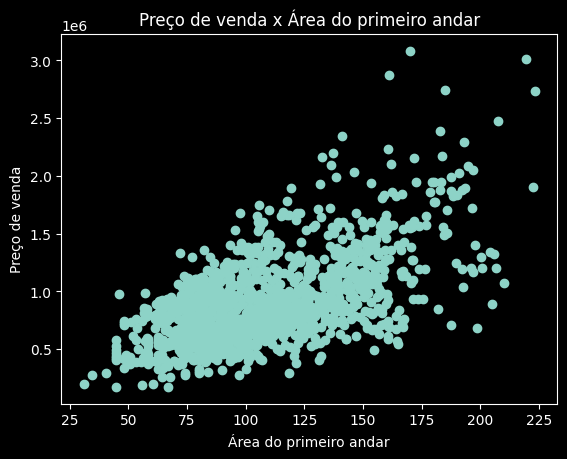

In [101]:
plt.scatter(df["area_primeiro_andar"], df["preco_de_venda"])
plt.title("Preço de venda x Área do primeiro andar")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")


Adding a linear line with aproximate values

Text(0, 0.5, 'Preço de venda')

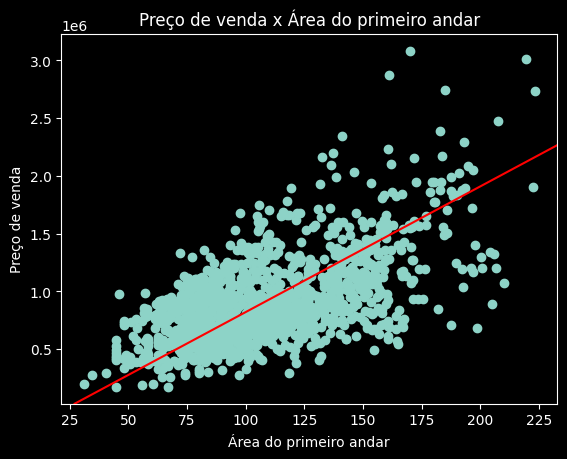

In [102]:
plt.scatter(df["area_primeiro_andar"], df["preco_de_venda"])
plt.axline(xy1=(66, 450000), xy2=(190, 1800000), color='red')
plt.title("Preço de venda x Área do primeiro andar")
plt.xlabel("Área do primeiro andar")
plt.ylabel("Preço de venda")


Adding a linear line with plotly (relationship beetween area_primeiro_andar and preco_de_venda)

In [103]:
px.scatter(df, x= "area_primeiro_andar", y = "preco_de_venda", trendline_color_override="red", trendline="ols")

# Topics
    - Obter o coeficiente de correlação dos dados;
    - Analisar a intensidade e a direção da correlação entre duas variáveis;
    - Identificar linearidade no gráfico de dispersão;
    - Diferenciar variável explicativa de variável resposta;
    - Visualizar a melhor reta utilizando o Plotly.

Sales price distribution plot

/tmp/ipykernel_20120/1492212542.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




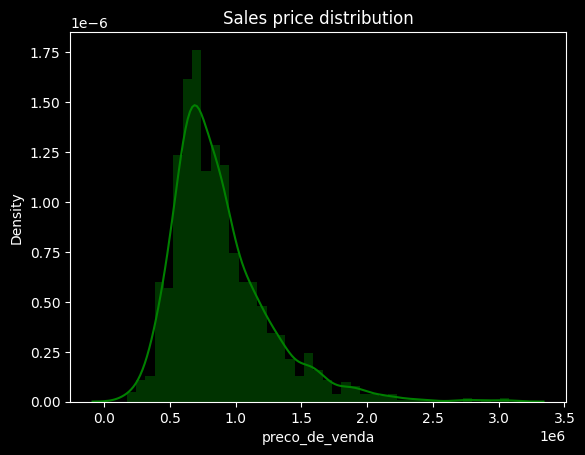

In [104]:
sns.distplot(df["preco_de_venda"], kde=True, color="green")
plt.title("Sales price distribution")
plt.show()

Separating DF into training and testing

In [105]:
y = df["preco_de_venda"]

x = df.drop(columns="preco_de_venda")

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=230)

Train base

In [107]:
df_train = pd.DataFrame(x_train)
df_train['preco_de_venda'] = y_train

In [108]:
model_0 = ols('preco_de_venda ~ area_primeiro_andar', data=df_train).fit()

Analyzing the coeficients

In [109]:
model_0.params

Intercept              164864.439435
area_primeiro_andar      6619.344778
dtype: float64

In [110]:
print(model_0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     678.4
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          6.90e-118
Time:                        09:27:31   Log-Likelihood:                -16076.
No. Observations:                1150   AIC:                         3.216e+04
Df Residuals:                    1148   BIC:                         3.217e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.649e+05   2

## Interpreting R²

It ranges from 0 to 1. A value close to 1 indicates that the model fits the data well, explaining most of the variation in the dependent/response variable. A value close to 0 indicates that the model cannot explain much variation in the dependent/response variable.

In [111]:
print(model_0.rsquared)

0.3714354924085448


Understanding waste 

In [112]:
print(model_0.resid)

653      77381.973756
89     -262592.054484
1277    -94363.521911
751     211211.003003
963    -168938.962002
            ...      
777     472166.115218
271    -483171.835358
723     463784.206566
560    -524457.799824
768     -31529.653574
Length: 1150, dtype: float64


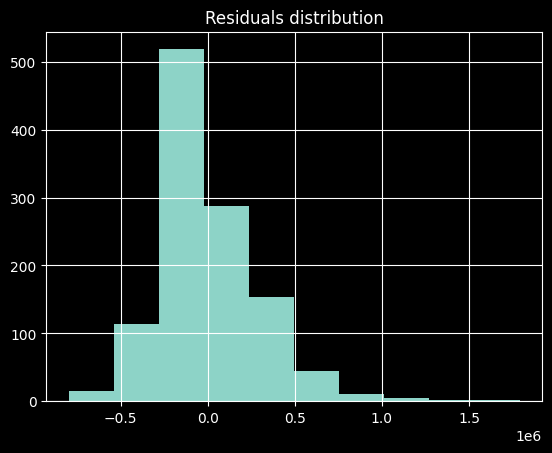

In [113]:
# Como estao distribuidos os residuos

model_0.resid.hist()
plt.title("Residuals distribution")
plt.show()


Conceito de residuos:
Diferença do que foi estimado pela reta com o que foi observado.
Residuo precisa estar próximo a 0, assim o que foi estimado está bem próximo do que foi observado.

# STARTING THE MODEL TEST 
    - Compare the model price with the real house price.

In [114]:
y_predict_= model_0.predict(x_test)

In [115]:
print("R2 score: ", r2_score(y_test, y_predict_))

R2 score:  0.3874376025090114


## R2 BASED ON AREA_PRIMEIRO_ANDAR | PRECO_VENDA

*TRAIN R2* = 0.3714354924085448

*PREDICT R2* = 0.3874376025090114

***GOOD RESULT***

# TOPICS
    - Dividir a base de dados para treinar e testar o modelo;
    - Interpretar os coeficientes de regressão linear simples;
    - Calcular e interpretar o coeficiente de determinação R²;
    - Analisar o quanto cada ponto de dados desvia da linha de regressão ajustada através dos resíduos;
    - Compreender quão bem os valores observados se ajustam ao modelo de regressão com R²;
    - Calcular o R² no conjunto teste.

# Looking at the data | results

The price of the house is 37% related to its area (first_floor)

In [116]:
# Analyzing other house price caracteristic

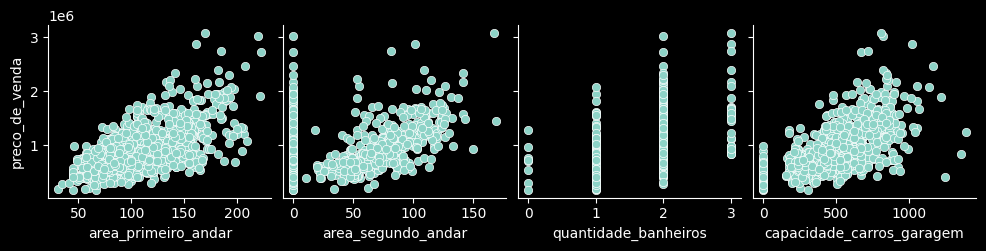

In [117]:
sns.pairplot(df, y_vars="preco_de_venda", x_vars=["area_primeiro_andar", "area_segundo_andar", "quantidade_banheiros", "capacidade_carros_garagem"])

In [118]:
x_train = sm.add_constant(x_train)

In [119]:
x_train.columns

Index(['const', 'area_primeiro_andar', 'existe_segundo_andar',
       'area_segundo_andar', 'quantidade_banheiros',
       'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [120]:
# MODELO DE REGRESSAO (SEM FORMULA): SATURADO
model_1 = sm.OLS(y_train, x_train[["const","area_primeiro_andar", "existe_segundo_andar", 
                                  "area_segundo_andar","quantidade_banheiros", "capacidade_carros_garagem", 
                                  "qualidade_da_cozinha_Excelente"]]).fit()

Second model = without the "area_segundo_andar" 

In [121]:
model_2 = sm.OLS(y_train,
                 x_train[["const","area_primeiro_andar", "existe_segundo_andar", 
                                  "quantidade_banheiros", "capacidade_carros_garagem", 
                                  "qualidade_da_cozinha_Excelente"]]).fit()

Third model = without the "capacidade_carros_garagem"

In [122]:
model_3 = sm.OLS(y_train,
                 x_train[["const","area_primeiro_andar", "existe_segundo_andar", 
                                  "quantidade_banheiros",
                                  "qualidade_da_cozinha_Excelente"]]).fit()

# Now, the model resumes

In [123]:
# MODEL 1
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     525.5
Date:                Fri, 11 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:27:33   Log-Likelihood:                -15581.
No. Observations:                1150   AIC:                         3.118e+04
Df Residuals:                    1143   BIC:                         3.121e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [124]:
# MODEL 2 
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     540.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          2.53e-298
Time:                        09:27:33   Log-Likelihood:                -15645.
No. Observations:                1150   AIC:                         3.130e+04
Df Residuals:                    1144   BIC:                         3.133e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [125]:
# MODEL 3 
print(model_3.summary())    

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     514.9
Date:                Fri, 11 Oct 2024   Prob (F-statistic):          4.76e-254
Time:                        09:27:33   Log-Likelihood:                -15751.
No. Observations:                1150   AIC:                         3.151e+04
Df Residuals:                    1145   BIC:                         3.154e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

# Now to compare the models 

In [126]:
print("R2")
print(f"modelo 0 -> {model_0.rsquared}")
print(f"modelo 1 -> {model_1.rsquared}")
print(f"modelo 2 -> {model_2.rsquared}")
print(f"modelo 3 -> {model_3.rsquared}")

R2
modelo 0 -> 0.3714354924085448
modelo 1 -> 0.733928097916559
modelo 2 -> 0.7027591264658356
modelo 3 -> 0.64270119099219


In [127]:
# Parâmetros nos modelos
print("Parâmetros")
print(f"Modelo 0 ->", len(model_0.params))
print(f"Modelo 1 ->", len(model_1.params))
print(f"Modelo 2 ->", len(model_2.params))
print(f"Modelo 3 ->", len(model_3.params))

Parâmetros
Modelo 0 -> 2
Modelo 1 -> 7
Modelo 2 -> 6
Modelo 3 -> 5


In [128]:
model_3.params

const                            -111914.854311
area_primeiro_andar                 5913.785097
existe_segundo_andar              204720.198028
quantidade_banheiros              153607.513409
qualidade_da_cozinha_Excelente    439225.489138
dtype: float64

# TOPICS 
    - Utilizar o pairplot do Seaborn para visualizar relações entre múltiplas variáveis e identificar quais podem influenciar o preço de venda das casas.
    - Adicionar múltiplas variáveis explicativas ao modelo de regressão linear para aprimorar a precisão das previsões de preço.
    - Comparar diferentes modelos de regressão linear utilizando o R² e o R² ajustado, além de analisar a multicolinearidade e outros fatores.
    - Descobrir como interpretar os coeficientes do modelo de regressão linear para entender o impacto de cada variável no preço das casas.
    - Entender a importância de escolher o modelo mais adequado para previsão de preços, considerando a simplicidade, a precisão e a interpretabilidade.

Pricing houses

In [129]:
x_test.columns

Index(['area_primeiro_andar', 'existe_segundo_andar', 'area_segundo_andar',
       'quantidade_banheiros', 'capacidade_carros_garagem',
       'qualidade_da_cozinha_Excelente'],
      dtype='object')

In [130]:
model_3.params

const                            -111914.854311
area_primeiro_andar                 5913.785097
existe_segundo_andar              204720.198028
quantidade_banheiros              153607.513409
qualidade_da_cozinha_Excelente    439225.489138
dtype: float64

*Now we need to add a constant value to x_test*

In [131]:
x_test = sm.add_constant(x_test)

# Forecasting with model_3

In [132]:
predict_3 = model_3.predict(x_test[['const','area_primeiro_andar', 'existe_segundo_andar',
                                    'quantidade_banheiros','qualidade_da_cozinha_Excelente']])

*R2 of model_3*

In [133]:
print("Model_3 RS --> ", model_3.rsquared)

Model_3 RS -->  0.64270119099219


*R2 of training* 

In [134]:
print("R2 score: ", r2_score(y_test, predict_3))

R2 score:  0.6590761715805478


# Pricing a new house

In [135]:
new_house = pd.DataFrame({'const': [1], 
                          'area_primeiro_andar': [120], 
                          'existe_segundo_andar': [1], 
                          'quantidade_banheiros': [2], 
                          'qualidade_da_cozinha_Excelente':[0]}, index=[0])

*House value with the model_0*

In [136]:
print("Price --> ", model_0.predict(new_house)[0])

Price -->  959185.8127675815


*House value with the model_3*

In [137]:
print("Price --> ", model_3.predict(new_house)[0])

Price -->  1109674.5822148302


# Pricing several houses with a CSV archive

In [138]:
several_test = pd.read_csv('data/Novas_casas.csv', sep=';')
several_test.head()

,Casa,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1,150,1,2,1
1,2,180,0,3,1
2,3,120,1,2,1
3,4,200,1,3,1
4,5,160,0,2,1


In [139]:
several_test.drop(columns="Casa", inplace=True)
several_test = sm.add_constant(several_test)
several_test.head()

,const,area_primeiro_andar,existe_segundo_andar,quantidade_banheiros,qualidade_da_cozinha_Excelente
0,1.0,150,1,2,1
1,1.0,180,0,3,1
2,1.0,120,1,2,1
3,1.0,200,1,3,1
4,1.0,160,0,2,1


In [140]:
for x in range(several_test.shape[0]):
    print(f"Price {x} -> ", model_3.predict(several_test.iloc[[x]]))

Price 0 ->  0    1.726314e+06
dtype: float64
Price 1 ->  1    1.852614e+06
dtype: float64
Price 2 ->  2    1.548900e+06
dtype: float64
Price 3 ->  3    2.175610e+06
dtype: float64
Price 4 ->  4    1.580731e+06
dtype: float64
Price 5 ->  5    1.227950e+06
dtype: float64
Price 6 ->  6    1.354251e+06
dtype: float64
Price 7 ->  7    1.523640e+06
dtype: float64
Price 8 ->  8    964092.235161
dtype: float64
Price 9 ->  9    1.618109e+06
dtype: float64


## Exercise --> pricing a new house

In [141]:
new_house_exercise = pd.DataFrame({'const': [1],
                                    'area_primeiro_andar': [98],
                                    'existe_segundo_andar': [0],
                                    'quantidade_banheiros': [1],
                                    'qualidade_da_cozinha_Excelente': [1]}, 
                                    index=[0])

In [142]:
print(model_3.predict(new_house_exercise)[0])

1060469.0877747466


# TOPICS

    - Obter a métrica R² do modelo a partir de dados de teste;
    - Entender a importância da comparação de métricas de treino e teste para checar a generalização do modelo;
    - Utilizar o método predict para realizar a previsão de novos valores a partir de um modelo de regressão;
    - Salvar um modelo de machine learning utilizando a biblioteca pickle;
    - Fazer a leitura de arquivos pickle para obter o modelo em seu estado original.

# Multicolinearidade

**When two or more things are so similar that it's hard to tell how much each of them is influencing the outcome**

In [144]:
explanation_1 = ['const', 'area_primeiro_andar', 
                 'existe_segundo_andar','area_segundo_andar', 'quantidade_banheiros', 
                 'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explanation_2 = ['const', 'area_primeiro_andar', 
                 'existe_segundo_andar','quantidade_banheiros', 
                 'capacidade_carros_garagem', 'qualidade_da_cozinha_Excelente']

explanation_3 = ['const', 'area_primeiro_andar', 
                 'existe_segundo_andar','quantidade_banheiros', 
                'qualidade_da_cozinha_Excelente']

### Calculating the VIF
    - If the VIF is less than 5, there is no collinearity

In [149]:
# VIF -> MODEL 01 
vif_1 = pd.DataFrame()

vif_1['var_01'] = explanation_1

vif_1["vif"] = [variance_inflation_factor(x_train[explanation_1], i) for i in range(len(explanation_1))]

In [146]:
vif_1

,var_01,vif
0,const,19.995742
1,area_primeiro_andar,2.103425
2,existe_segundo_andar,7.469253
3,area_segundo_andar,7.647355
4,quantidade_banheiros,1.696428
5,capacidade_carros_garagem,1.549245
6,qualidade_da_cozinha_Excelente,1.155626


***VIF greater than 5 indicates the presence of multicollinearity, such as “second_floor_area” and “second_floor_existence”, if second_floor_area is greater than 0, then it already indicates that there is a second floor.***

In [153]:
# VIF --> MODEL 03
vif_3 = pd.DataFrame()

vif_3['var_01'] = explanation_3

vif_3["vif"] = [variance_inflation_factor(x_train[explanation_3], i) for i in range(len(explanation_3))]

In [154]:
vif_3

,var_01,vif
0,const,18.464206
1,area_primeiro_andar,1.836367
2,existe_segundo_andar,1.591927
3,quantidade_banheiros,1.509883
4,qualidade_da_cozinha_Excelente,1.124930


# Analyzing waste
    - Waste = Discrepancy between real and the predicted values for the same data points.

In [156]:
y_predict_train = model_3.predict(x_train[explanation_3])

### Make a scatter plot between y_predict and y_predict_train

In [160]:
fig = px.scatter (x= y_predict_train, y = y_train,
                  title = 'Predict x Actual',
                  labels = {'x':'Predict price', 'y':'Actual price'})

fig.show()

<Axes: title={'center': 'Residuals x Predicted values'}, xlabel='House price -> predicted values', ylabel='Residuals'>

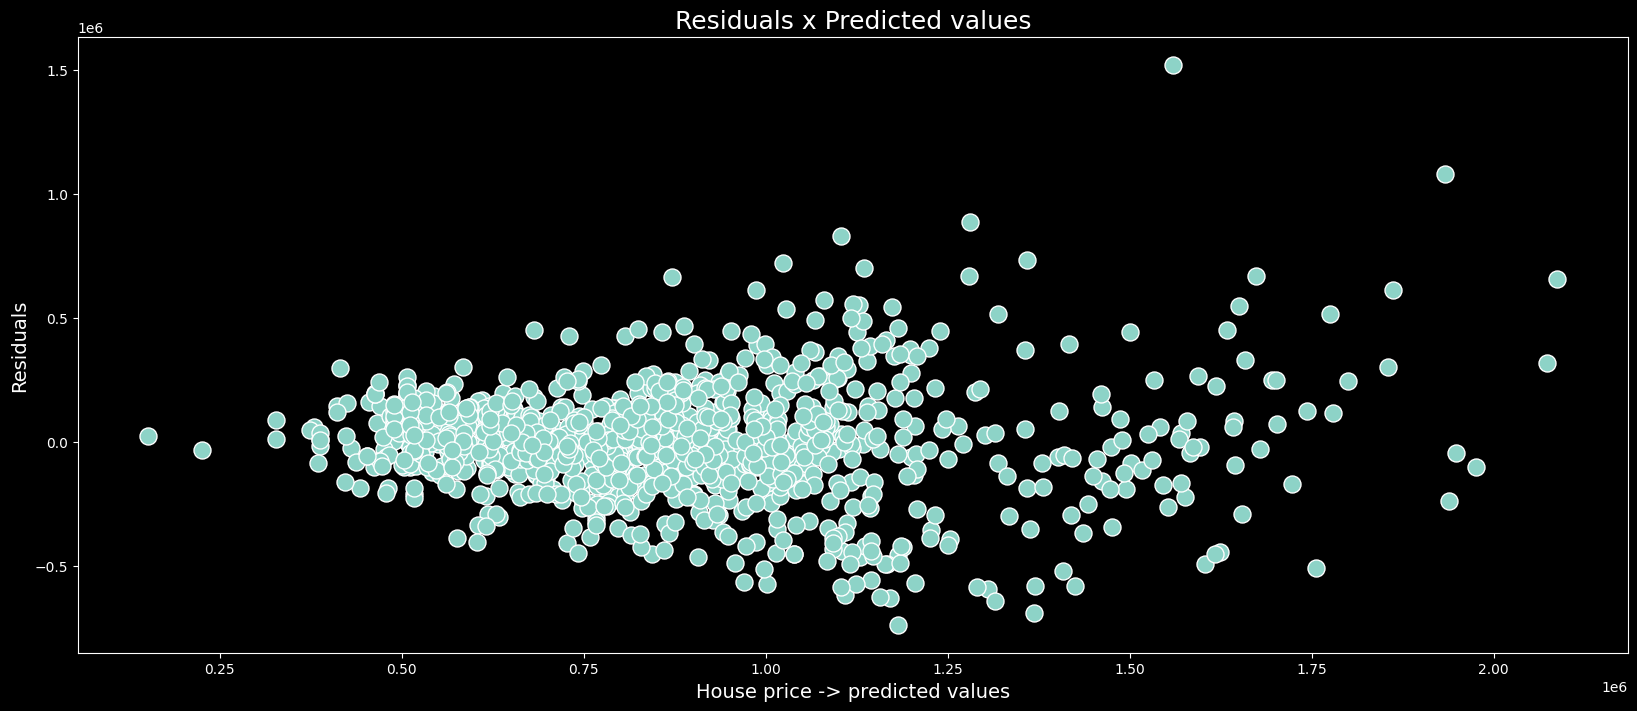

In [164]:
# Waste

waste = model_3.resid 

ax = sns.scatterplot(x = y_predict_train, y = model_3.resid, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residuals x Predicted values', fontsize=18)
ax.set_xlabel('House price -> predicted values', fontsize=14)
ax.set_ylabel('Residuals', fontsize=14)
ax

## *In linear regression models, residuals MUST NOT appear in patterns, they must always be dispersed in relation to y / x*

    -This indicates the presence of heteroscedasticity, but we must obtain results with the presence of homoscedasticity   